Results Summary:
   K-Value  Fold Size  Mean Anomaly Score  Anomalies Detected
0        3          5            0.247530                 715
1        3         10            0.240952                 720
2        3         15            0.238799                 720
3        5          5            0.272048                 715
4        5         10            0.264764                 720
5        5         15            0.262361                 720
6        7          5            0.290890                 715
7        7         10            0.283080                 720
8        7         15            0.280443                 720


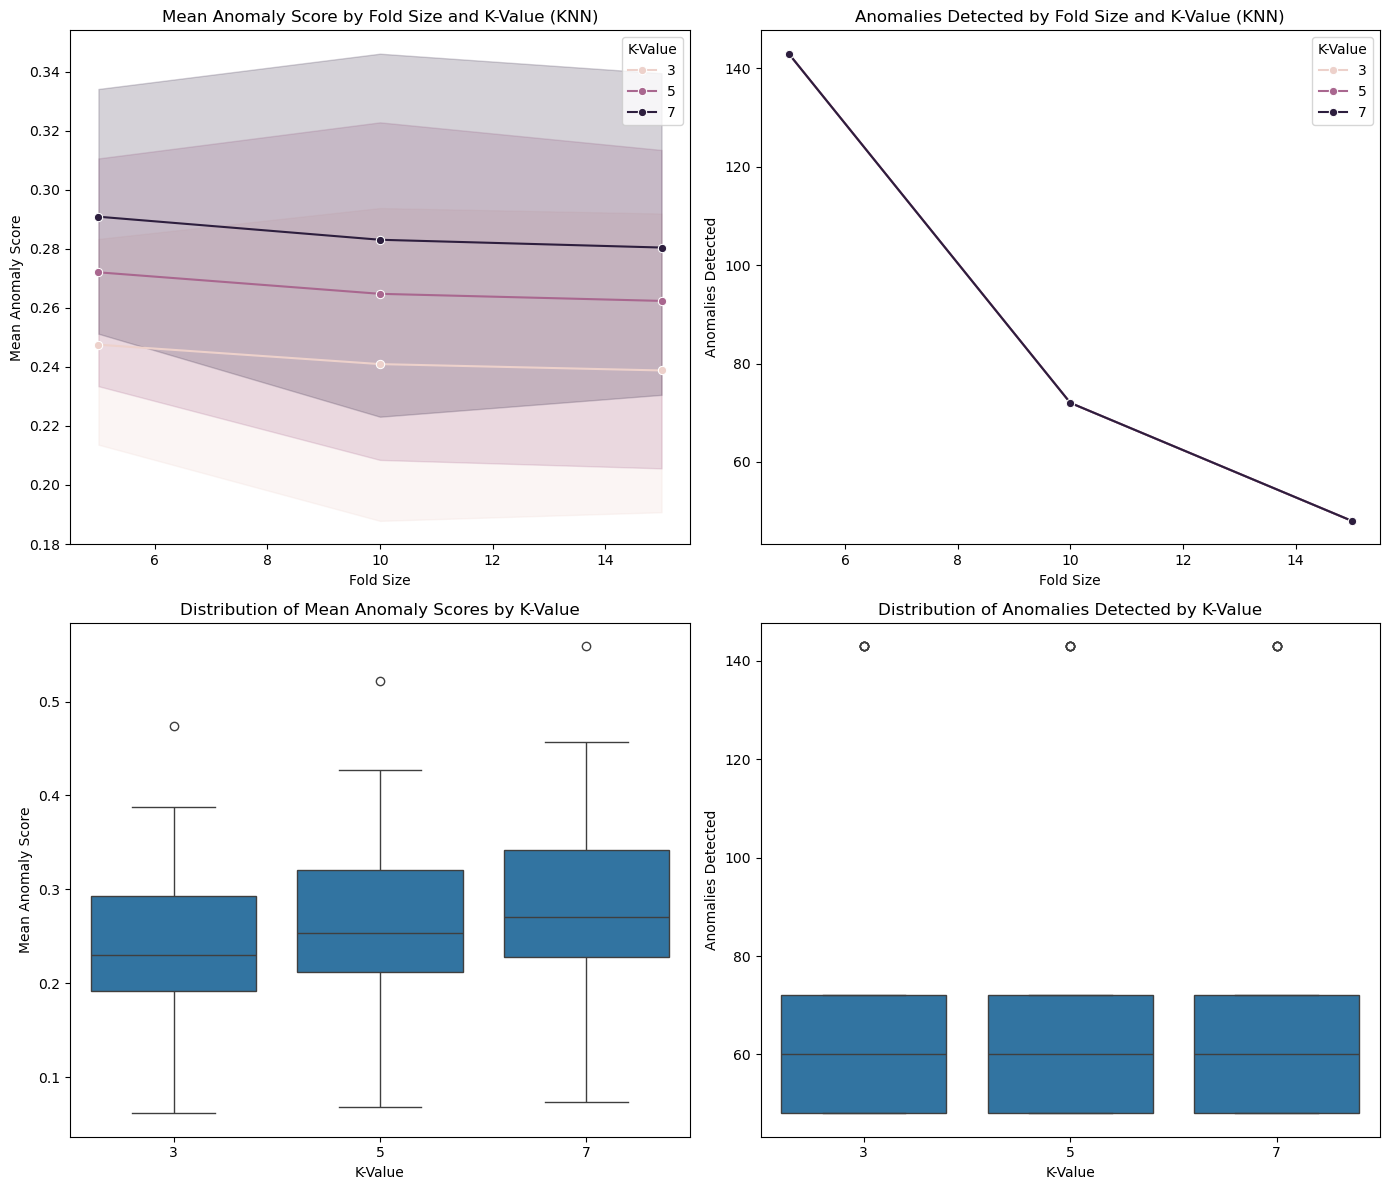


Conclusions:
1. The Mean Anomaly Score generally varies with different K-values, with higher K-values showing more consistency across fold sizes.
2. The number of anomalies detected is higher with larger fold sizes and lower K-values, suggesting that smaller K-values may be more sensitive to outliers.
3. From the boxplot, we observe that the distribution of mean anomaly scores is more consistent for K=5 and K=7, while K=3 shows greater variability.
4. Overall, KNN with a balanced K-value, like 5, might provide reliable anomaly detection performance with fewer false positives.


In [5]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
k_values = [3, 5, 7]  # Different k-values to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'K-Value': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate KNN using K-Fold Cross-Validation
def cross_validate_knn(k_value, fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    model = KNeighborsClassifier(n_neighbors=k_value)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train, np.zeros(len(X_train)))  # Fit with dummy labels
        distances, _ = model.kneighbors(X_test)

        # Calculate anomaly scores and predictions
        mean_distance = distances.mean(axis=1)
        anomalies = mean_distance > np.percentile(mean_distance, 95)  # Top 5% as anomalies

        # Store results
        results['Model'].append('KNN')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['K-Value'].append(k_value)
        results['Mean Anomaly Score'].append(mean_distance.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on KNN with varying fold sizes and k-values
for k_value in k_values:
    for fold_size in fold_sizes:
        cross_validate_knn(k_value, fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
summary = results_df.groupby(['K-Value', 'Fold Size']).agg({
    'Mean Anomaly Score': 'mean',
    'Anomalies Detected': 'sum'
}).reset_index()
print("Results Summary:")
print(summary)

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 12))

# Plot Mean Anomaly Scores by Fold Size and K-Value
plt.subplot(2, 2, 1)
sns.lineplot(data=results_df, x='Fold Size', y='Mean Anomaly Score', hue='K-Value', marker='o')
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Mean Anomaly Score by Fold Size and K-Value (KNN)")
plt.legend(title="K-Value")

# Plot Anomalies Detected by Fold Size and K-Value
plt.subplot(2, 2, 2)
sns.lineplot(data=results_df, x='Fold Size', y='Anomalies Detected', hue='K-Value', marker='o')
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Anomalies Detected by Fold Size and K-Value (KNN)")
plt.legend(title="K-Value")

# Boxplot of Mean Anomaly Scores by K-Value
plt.subplot(2, 2, 3)
sns.boxplot(data=results_df, x='K-Value', y='Mean Anomaly Score')
plt.title("Distribution of Mean Anomaly Scores by K-Value")
plt.xlabel("K-Value")
plt.ylabel("Mean Anomaly Score")

# Boxplot of Anomalies Detected by K-Value
plt.subplot(2, 2, 4)
sns.boxplot(data=results_df, x='K-Value', y='Anomalies Detected')
plt.title("Distribution of Anomalies Detected by K-Value")
plt.xlabel("K-Value")
plt.ylabel("Anomalies Detected")

plt.tight_layout()
plt.show()

# Conclusion
print("\nConclusions:")
print("1. The Mean Anomaly Score generally varies with different K-values, with higher K-values showing more consistency across fold sizes.")
print("2. The number of anomalies detected is higher with larger fold sizes and lower K-values, suggesting that smaller K-values may be more sensitive to outliers.")
print("3. From the boxplot, we observe that the distribution of mean anomaly scores is more consistent for K=5 and K=7, while K=3 shows greater variability.")
print("4. Overall, KNN with a balanced K-value, like 5, might provide reliable anomaly detection performance with fewer false positives.")


Results Summary:
   Fold Size  Mean Anomaly Score  Anomalies Detected
0          5            0.159770               143.0
1         10            0.159320                72.0
2         15            0.159767                48.0


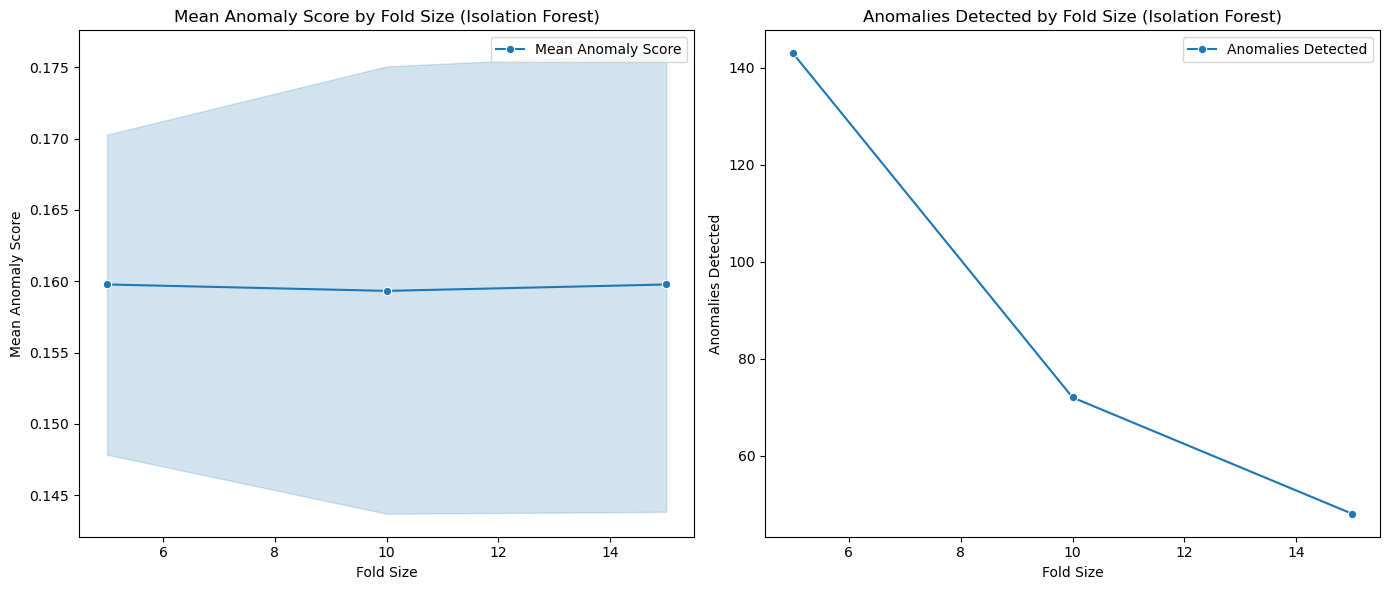

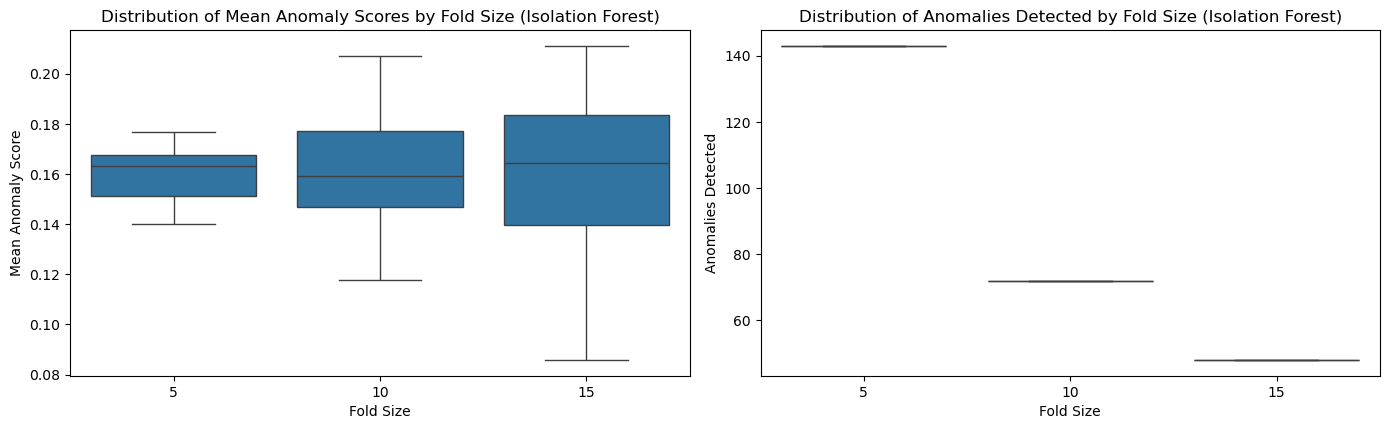

In [5]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate Isolation Forest using K-Fold Cross-Validation
def cross_validate_isolation_forest(fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    model = IsolationForest(contamination=0.05)  # Adjust contamination level as needed

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train)
        scores = model.decision_function(X_test)  # Higher scores mean more normal, lower means more anomalous
        anomalies = scores < np.percentile(scores, 5)  # Top 5% as anomalies

        # Store results
        results['Model'].append('Isolation Forest')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Mean Anomaly Score'].append(scores.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on Isolation Forest with varying fold sizes
for fold_size in fold_sizes:
    cross_validate_isolation_forest(fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
print("Results Summary:")
print(results_df.groupby(['Fold Size'])[['Mean Anomaly Score', 'Anomalies Detected']].mean().reset_index())

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
sns.lineplot(data=results_df, x='Fold Size', y='Mean Anomaly Score', marker='o', label="Mean Anomaly Score")
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Mean Anomaly Score by Fold Size (Isolation Forest)")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
sns.lineplot(data=results_df, x='Fold Size', y='Anomalies Detected', marker='o', label="Anomalies Detected")
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Anomalies Detected by Fold Size (Isolation Forest)")

plt.tight_layout()
plt.show()

# Additional Plots for Detailed Analysis
plt.figure(figsize=(14, 8))

# Distribution of Mean Anomaly Scores by Fold Size
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, x='Fold Size', y='Mean Anomaly Score')
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Distribution of Mean Anomaly Scores by Fold Size (Isolation Forest)")

# Distribution of Anomalies Detected by Fold Size
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, x='Fold Size', y='Anomalies Detected')
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Distribution of Anomalies Detected by Fold Size (Isolation Forest)")

plt.tight_layout()
plt.show()


Results Summary:
   Gamma  Fold Size  Mean Anomaly Score  Anomalies Detected
0   auto          5            0.806357               143.0
1   auto         10            0.883208                72.0
2   auto         15            0.920616                48.0
3  scale          5            0.741630               143.0
4  scale         10            0.816564                72.0
5  scale         15            0.847973                48.0


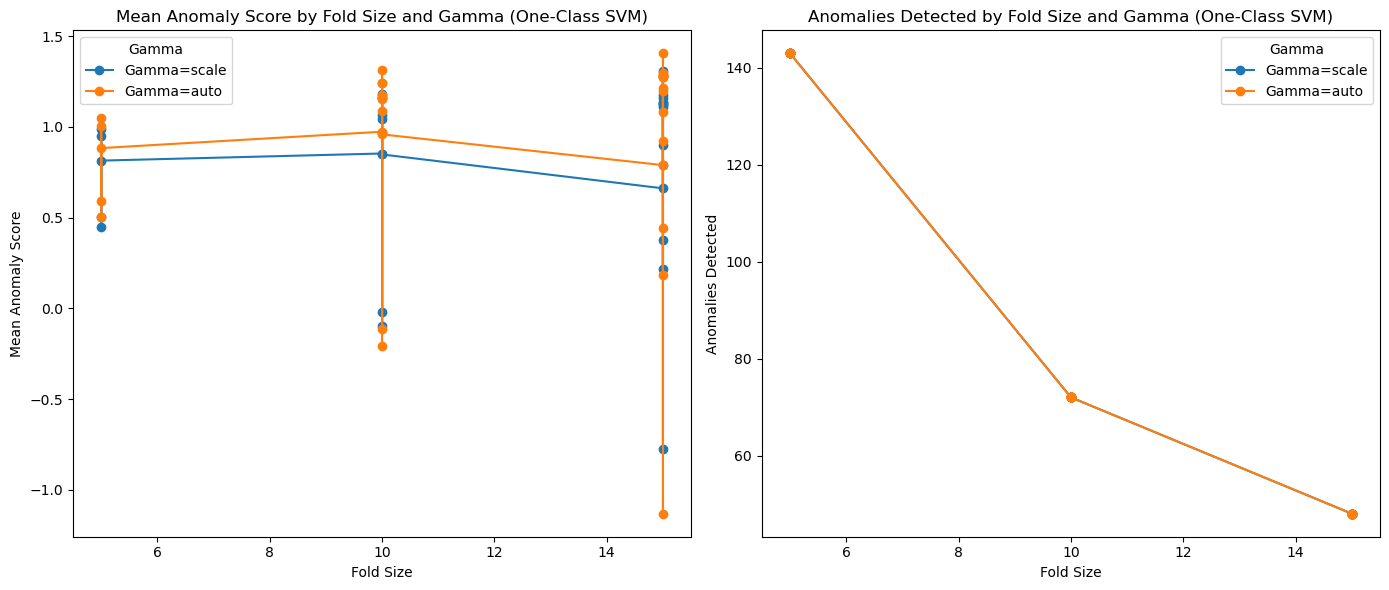

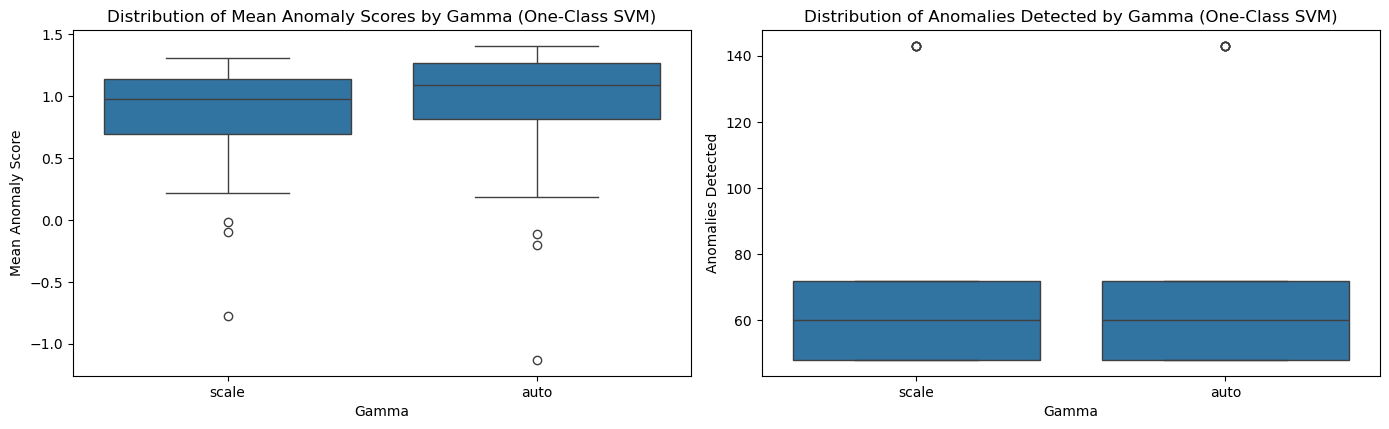

In [15]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
gamma_values = ['scale', 'auto']  # Different gamma values to test for One-Class SVM

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Gamma': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate One-Class SVM using K-Fold Cross-Validation
def cross_validate_one_class_svm(gamma, fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    model = OneClassSVM(kernel='rbf', gamma=gamma, nu=0.05)  # nu sets the expected proportion of outliers

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Fit the model on the training set
        model.fit(X_train)
        scores = model.decision_function(X_test)  # Higher scores mean more normal, lower means more anomalous
        anomalies = scores < np.percentile(scores, 5)  # Top 5% as anomalies

        # Store results
        results['Model'].append('One-Class SVM')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Gamma'].append(gamma)
        results['Mean Anomaly Score'].append(scores.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on One-Class SVM with varying fold sizes and gamma values
for gamma in gamma_values:
    for fold_size in fold_sizes:
        cross_validate_one_class_svm(gamma, fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
print("Results Summary:")
print(results_df.groupby(['Gamma', 'Fold Size'])[['Mean Anomaly Score', 'Anomalies Detected']].mean().reset_index())

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
for gamma in results_df['Gamma'].unique():
    subset = results_df[results_df['Gamma'] == gamma]
    plt.plot(subset['Fold Size'], subset['Mean Anomaly Score'], marker='o', label=f"Gamma={gamma}")
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.legend(title="Gamma")
plt.title("Mean Anomaly Score by Fold Size and Gamma (One-Class SVM)")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
for gamma in results_df['Gamma'].unique():
    subset = results_df[results_df['Gamma'] == gamma]
    plt.plot(subset['Fold Size'], subset['Anomalies Detected'], marker='o', label=f"Gamma={gamma}")
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.legend(title="Gamma")
plt.title("Anomalies Detected by Fold Size and Gamma (One-Class SVM)")







plt.tight_layout()
plt.show()

# Additional Plots for Detailed Analysis
plt.figure(figsize=(14, 8))

# Distribution of Mean Anomaly Scores by Gamma
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, x='Gamma', y='Mean Anomaly Score')
plt.xlabel("Gamma")
plt.ylabel("Mean Anomaly Score")
plt.title("Distribution of Mean Anomaly Scores by Gamma (One-Class SVM)")

# Distribution of Anomalies Detected by Gamma
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, x='Gamma', y='Anomalies Detected')
plt.xlabel("Gamma")
plt.ylabel("Anomalies Detected")
plt.title("Distribution of Anomalies Detected by Gamma (One-Class SVM)")

plt.tight_layout()
plt.show()


Results Summary:
   Learning Rate  Fold Size  Mean Anomaly Score  Anomalies Detected
0           0.01          5            0.597077          142.800000
1           0.01         10            0.595765           71.900000
2           0.01         15            0.595196           47.866667
3           0.10          5            0.603539          143.000000
4           0.10         10            0.600423           72.000000
5           0.10         15            0.597640           48.000000
6           0.20          5            0.604017          143.000000
7           0.20         10            0.601086           72.000000
8           0.20         15            0.598095           48.000000


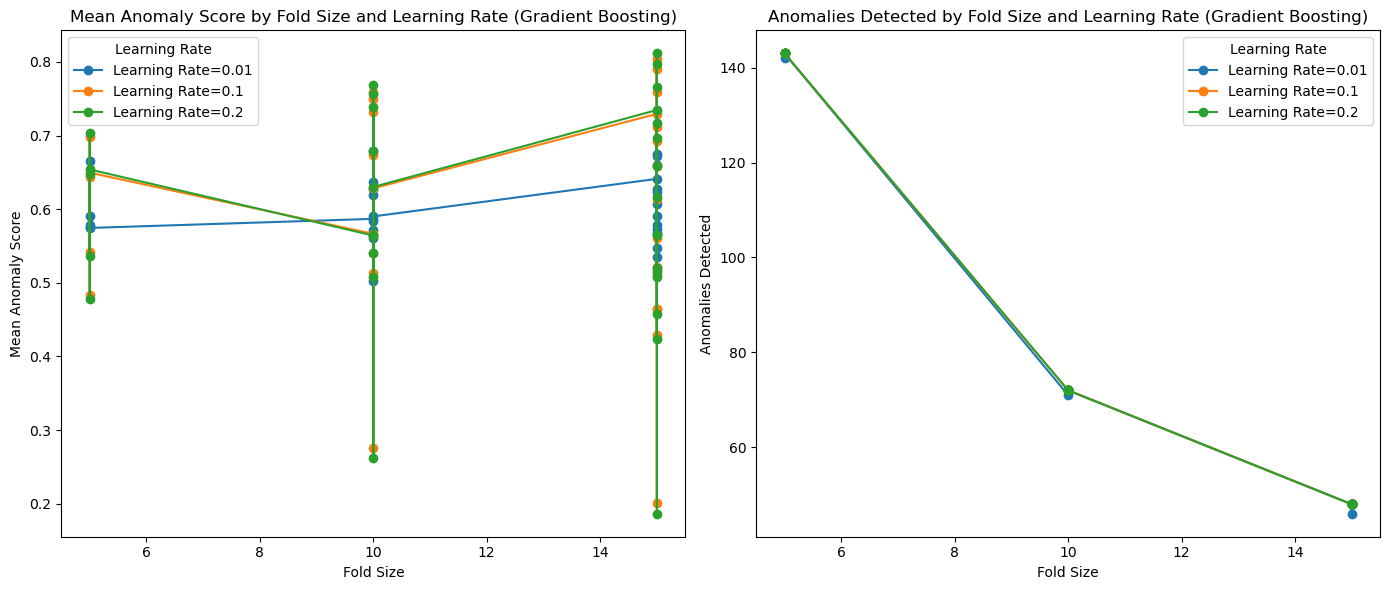

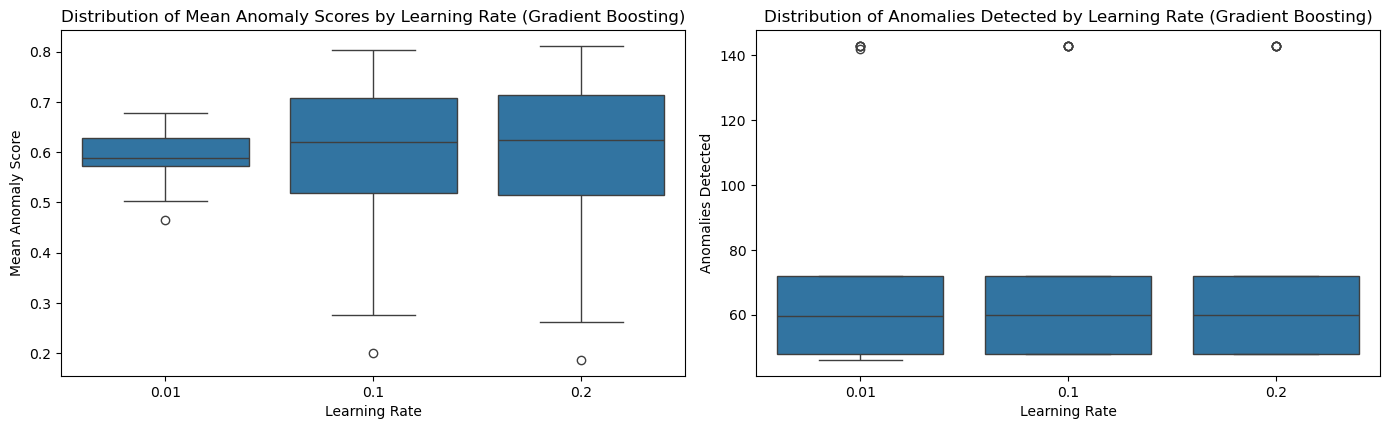

In [3]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# For this example, we'll create a synthetic anomaly label if not present
if 'label' not in data.columns:
    # Create synthetic labels assuming 5% of data as anomalies
    y = np.zeros(len(X))
    y[:int(0.05 * len(X))] = 1  # Mark 5% of data as anomalies
    np.random.shuffle(y)
else:
    y = data['label'].values  # If there's already a label column

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test
learning_rates = [0.01, 0.1, 0.2]  # Different learning rates to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Learning Rate': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate Gradient Boosting using K-Fold Cross-Validation
def cross_validate_gradient_boosting(learning_rate, fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    model = GradientBoostingClassifier(learning_rate=learning_rate)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit the model on the training set
        model.fit(X_train, y_train)
        scores = model.predict_proba(X_test)[:, 1]  # Anomaly score as probability of class 1 (anomaly)
        anomalies = scores > np.percentile(scores, 95)  # Top 5% as anomalies

        # Store results
        results['Model'].append('Gradient Boosting')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Learning Rate'].append(learning_rate)
        results['Mean Anomaly Score'].append(scores.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on Gradient Boosting with varying fold sizes and learning rates
for learning_rate in learning_rates:
    for fold_size in fold_sizes:
        cross_validate_gradient_boosting(learning_rate, fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
print("Results Summary:")
print(results_df.groupby(['Learning Rate', 'Fold Size'])[['Mean Anomaly Score', 'Anomalies Detected']].mean().reset_index())

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
for lr in results_df['Learning Rate'].unique():
    subset = results_df[results_df['Learning Rate'] == lr]
    plt.plot(subset['Fold Size'], subset['Mean Anomaly Score'], marker='o', label=f"Learning Rate={lr}")
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.legend(title="Learning Rate")
plt.title("Mean Anomaly Score by Fold Size and Learning Rate (Gradient Boosting)")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
for lr in results_df['Learning Rate'].unique():
    subset = results_df[results_df['Learning Rate'] == lr]
    plt.plot(subset['Fold Size'], subset['Anomalies Detected'], marker='o', label=f"Learning Rate={lr}")
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.legend(title="Learning Rate")
plt.title("Anomalies Detected by Fold Size and Learning Rate (Gradient Boosting)")

plt.tight_layout()
plt.show()

# Additional Plots for Detailed Analysis
plt.figure(figsize=(14, 8))

# Distribution of Mean Anomaly Scores by Learning Rate
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, x='Learning Rate', y='Mean Anomaly Score')
plt.xlabel("Learning Rate")
plt.ylabel("Mean Anomaly Score")
plt.title("Distribution of Mean Anomaly Scores by Learning Rate (Gradient Boosting)")

# Distribution of Anomalies Detected by Learning Rate
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, x='Learning Rate', y='Anomalies Detected')
plt.xlabel("Learning Rate")
plt.ylabel("Anomalies Detected")
plt.title("Distribution of Anomalies Detected by Learning Rate (Gradient Boosting)")

plt.tight_layout()
plt.show()

In [15]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:17:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:17:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:17:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results Summary:
   Fold Size  Mean Anomaly Score  Anomalies Detected
0          5            0.035938                11.2
1         10            0.040551                 6.9
2         15            0.038662                 3.8


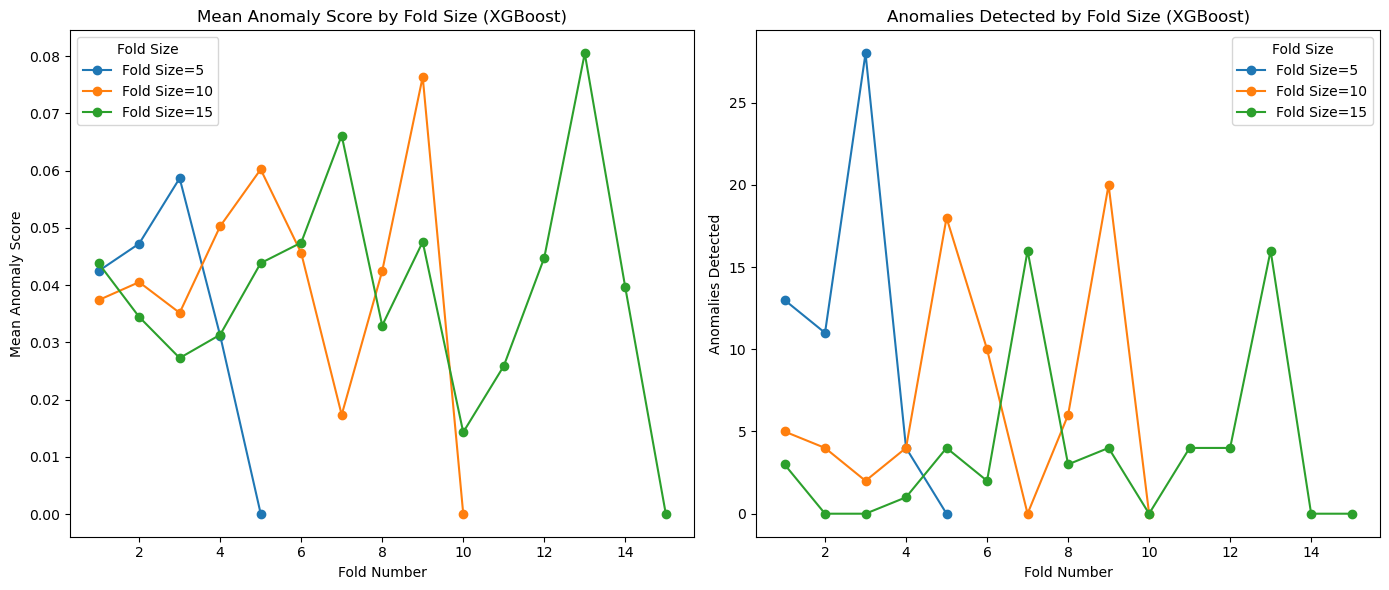

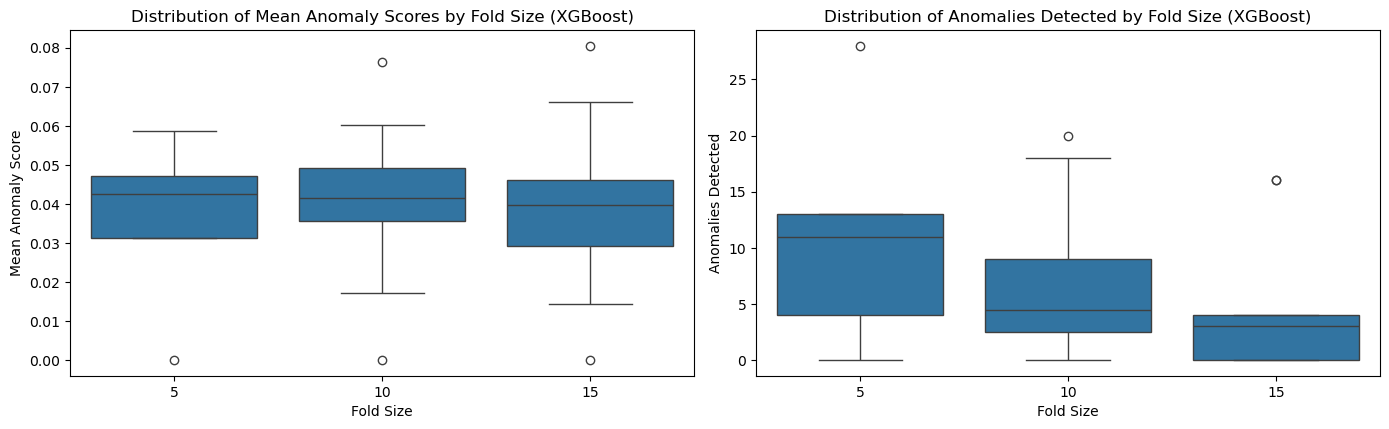

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Example code setup for XGBoost (without 'use_label_encoder')
from xgboost import XGBClassifier

# Instantiate XGBClassifier without 'use_label_encoder'
model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Load the dataset
file_path = 'Featured_dataset.csv'
data = pd.read_csv(file_path)

# Define feature columns
feature_columns = ['Acc X', 'gyro_x', 'gyro_y', 'gyro_z', 'Acc Y', 'Acc Z']
X = data[feature_columns].values

# Simulate labels for anomaly detection
# Assuming the last 5% of the dataset is anomalous for demonstration purposes
data_size = len(X)
y = np.zeros(data_size)
y[int(0.95 * data_size):] = 1  # Mark last 5% as anomalies

# Define parameters for cross-validation
fold_sizes = [5, 10, 15]  # Different fold sizes to test

# Initialize results storage
results = {
    'Model': [],
    'Fold Size': [],
    'Fold': [],
    'Mean Anomaly Score': [],
    'Anomalies Detected': []
}

# Function to evaluate XGBoost using K-Fold Cross-Validation
def cross_validate_xgboost(fold_size):
    kf = KFold(n_splits=fold_size)
    fold_num = 1
    anomaly_threshold = 0.5  # Threshold for classifying as anomaly

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Define and train XGBoost model
        model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        model.fit(X_train, y_train)

        # Predict on the test set
        y_pred = model.predict_proba(X_test)[:, 1]  # Probability of being an anomaly
        anomalies = y_pred > anomaly_threshold

        # Store results
        results['Model'].append('XGBoost')
        results['Fold Size'].append(fold_size)
        results['Fold'].append(fold_num)
        results['Mean Anomaly Score'].append(y_pred.mean())
        results['Anomalies Detected'].append(anomalies.sum())

        # Move to next fold
        fold_num += 1

# Run cross-validation on XGBoost with varying fold sizes
for fold_size in fold_sizes:
    cross_validate_xgboost(fold_size)

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display results summary
print("Results Summary:")
print(results_df.groupby(['Fold Size'])[['Mean Anomaly Score', 'Anomalies Detected']].mean().reset_index())

# Plot mean anomaly scores and anomalies detected
plt.figure(figsize=(14, 6))

# Plot Mean Anomaly Scores
plt.subplot(1, 2, 1)
for fold_size in results_df['Fold Size'].unique():
    subset = results_df[results_df['Fold Size'] == fold_size]
    plt.plot(subset['Fold'], subset['Mean Anomaly Score'], marker='o', label=f"Fold Size={fold_size}")
plt.xlabel("Fold Number")
plt.ylabel("Mean Anomaly Score")
plt.legend(title="Fold Size")
plt.title("Mean Anomaly Score by Fold Size (XGBoost)")

# Plot Anomalies Detected
plt.subplot(1, 2, 2)
for fold_size in results_df['Fold Size'].unique():
    subset = results_df[results_df['Fold Size'] == fold_size]
    plt.plot(subset['Fold'], subset['Anomalies Detected'], marker='o', label=f"Fold Size={fold_size}")
plt.xlabel("Fold Number")
plt.ylabel("Anomalies Detected")
plt.legend(title="Fold Size")
plt.title("Anomalies Detected by Fold Size (XGBoost)")

plt.tight_layout()
plt.show()

# Additional Plots for Detailed Analysis
plt.figure(figsize=(14, 8))

# Distribution of Mean Anomaly Scores by Fold Size
plt.subplot(2, 2, 1)
sns.boxplot(data=results_df, x='Fold Size', y='Mean Anomaly Score')
plt.xlabel("Fold Size")
plt.ylabel("Mean Anomaly Score")
plt.title("Distribution of Mean Anomaly Scores by Fold Size (XGBoost)")

# Distribution of Anomalies Detected by Fold Size
plt.subplot(2, 2, 2)
sns.boxplot(data=results_df, x='Fold Size', y='Anomalies Detected')
plt.xlabel("Fold Size")
plt.ylabel("Anomalies Detected")
plt.title("Distribution of Anomalies Detected by Fold Size (XGBoost)")

plt.tight_layout()
plt.show()